In [14]:
import requests
#from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
import urllib.request
from urllib.error import HTTPError
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle5 as pickle

In [118]:
#df = pickle.load('./Movies_With_Image.pkl')
with open('C:/Users/peter/Downloads/Deep Learning/Final/Movie_Almost.pkl', "rb") as fh:
      df = pickle.load(fh)

In [119]:
df

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,action,adult,adventure,animation,...,musical,mystery,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,"[Animation, Adventure, Comedy]",https://images-na.ssl-images-amazon.com/images...,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,"[Action, Adventure, Family]",https://images-na.ssl-images-amazon.com/images...,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,"[Comedy, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,"[Comedy, Drama, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,"[Comedy, Family, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40102,83291,http://www.imdb.com/title/tt83291,Los violadores (1981),5.5,"[Action, Thriller]",https://images-na.ssl-images-amazon.com/images...,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40103,83168,http://www.imdb.com/title/tt83168,Tanya's Island (1980),4.3,[Drama],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40104,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,[Comedy],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40105,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,[Horror],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df['Genre2'] = df["Genre"].map(lambda x : x.split("|")[0])
df.drop(["Genre"], inplace=True, axis=1)
all_genres = np.unique(df['Genre2'].values)
for x in all_genres:
    df[x] = 0

In [12]:
#df.drop(all_genres,axis=1,inplace=True)
separator = '|'
df["Genre2"] = df.Genre.map(lambda x: separator.join(x))

In [143]:
# Encoding of the labels 
for genre in all_genres:
    df[genre.lower()] = df.Genre.map(lambda x: 1 if genre in x else 0)

In [108]:
df

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,action,adventure,animation,biography,...,mystery,romance,sci-fi,short,sport,thriller,war,western,Genre2,Image_Paths
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,"[Animation, Adventure, Comedy]",https://images-na.ssl-images-amazon.com/images...,0,1,1,0,...,0,0,0,0,0,0,0,0,Animation|Adventure|Comedy,Posters\114709.jpg
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,"[Action, Adventure, Family]",https://images-na.ssl-images-amazon.com/images...,1,1,0,0,...,0,0,0,0,0,0,0,0,Action|Adventure|Family,Posters\113497.jpg
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,"[Comedy, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,0,0,0,0,Comedy|Romance,Posters\113228.jpg
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,"[Comedy, Drama, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,0,0,0,0,Comedy|Drama|Romance,Posters\114885.jpg
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,"[Comedy, Family, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,0,0,0,0,Comedy|Family|Romance,Posters\113041.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35422,83291,http://www.imdb.com/title/tt83291,Los violadores (1981),5.5,"[Action, Thriller]",https://images-na.ssl-images-amazon.com/images...,1,0,0,0,...,0,0,0,0,0,1,0,0,Action|Thriller,Posters\83291.jpg
35423,83168,http://www.imdb.com/title/tt83168,Tanya's Island (1980),4.3,[Drama],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,Drama,Posters\83168.jpg
35424,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,[Comedy],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,Comedy,Posters\82875.jpg
35425,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,[Horror],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,Horror,Posters\815258.jpg


In [121]:
all_genre = []
for x in df['Genre'].values:
    for i in range(len(x)):
        all_genre.append(x[i])
# all_genre2 = []
# for x in a['Genre2'].values:
#     all_genre2.append(x)
        



In [122]:
uniq, counts = np.unique(all_genre, return_counts=True)
#uniq2, counts2 = np.unique(all_genre2, return_counts=True)

In [123]:
d = dict(zip(uniq, counts))
#d1 = dict(zip(uniq2,counts2))

In [124]:
sorted_dict = {}
sorted_keys = sorted(d, key=d.get)

In [125]:
sorted_dict = {}
sorted_keys = sorted(d, key=d.get)
for w in sorted_keys:
    sorted_dict[w] = d[w]

In [126]:
xt = ["0", "5,000", "10,000", "15,000", "20,000"]
ticks = [0, 5000, 10000, 15000, 20000]

In [129]:
len(sorted_dict.keys())

28

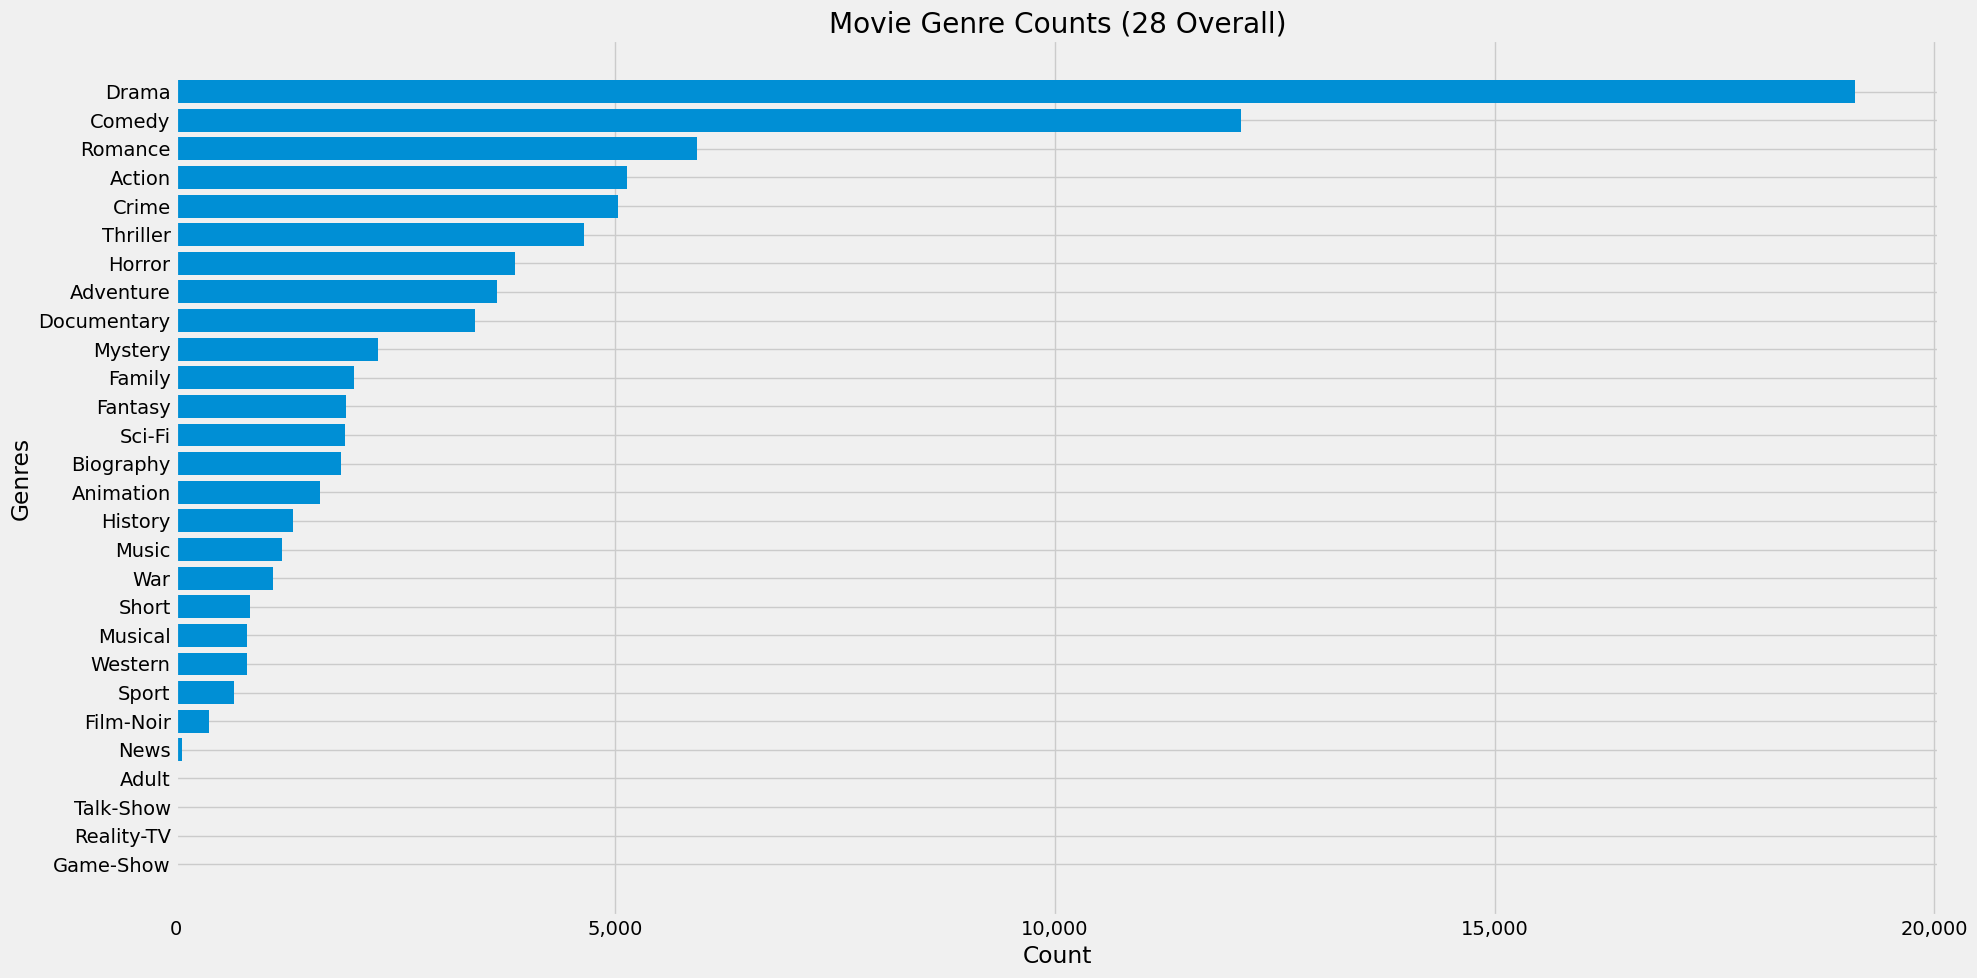

In [130]:

from matplotlib.pyplot import figure
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')
figure(figsize=(20, 10), dpi=100)
plt.barh(list(sorted_dict.keys()), sorted_dict.values())
plt.xticks( ticks,xt)
plt.ylabel("Genres")
plt.xlabel("Count")
plt.title("Movie Genre Counts (28 Overall)")
plt.show()


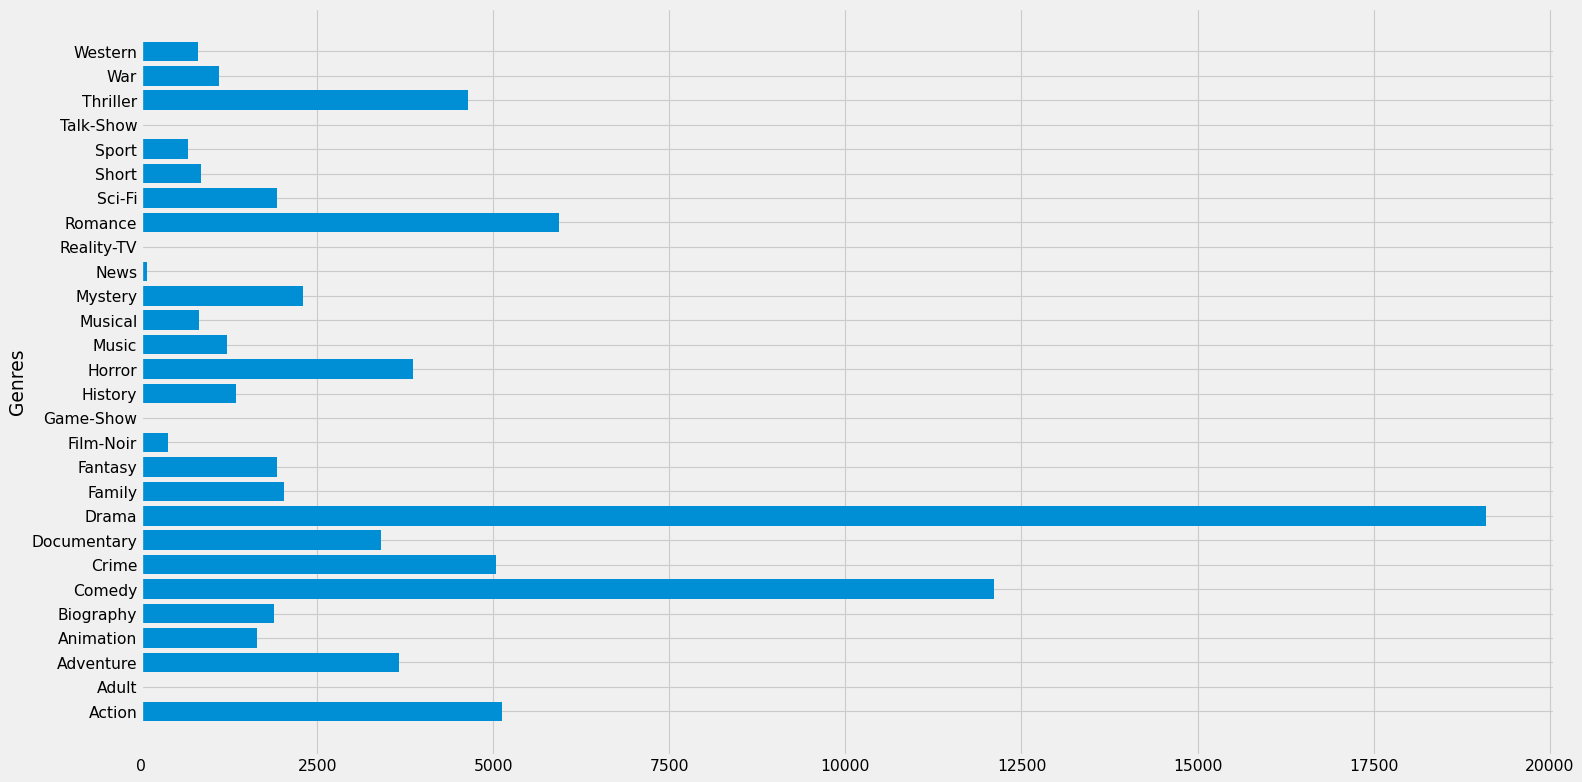

In [11]:
from matplotlib.pyplot import figure
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')
figure(figsize=(20, 10), dpi=80)
plt.barh(list(d.keys()), d.values())
#plt.xticks( range(len(d)), list(d.keys()))
plt.ylabel("Genres")
plt.show()


In [100]:
image_list = []
for file in glob.glob("Posters/*.jpg"):
    image_list.append(file)
    
print("Number of files found:", len(image_list))

Number of files found: 35427


In [155]:
# Construct new dataframe with image paths 
image_paths = []
imdb_id = []
genres = []
titles = []

for file in glob.glob("Posters/*.jpg"):
    
    #img_id = file.split('.')[0]    
    img_id = file[file.find('/')+1 : file.find('.')].replace("Posters\\","")
    #print(img_id)
    title = df[df["imdbId"] == int(img_id)]["Title"].values[0]
    genre = df[df["imdbId"] == int(img_id)]["Genre"].values[0]
    
    image_paths.append(file)
    imdb_id.append(int(img_id))
    
    
df_2 = pd.DataFrame({'imdbId': imdb_id,'Image_Paths': image_paths})

In [164]:
a = df.merge(df_2, how='inner', on ='imdbId')

In [151]:

with open('C:/Users/peter/Downloads/Deep Learning/Final/Movies_With_Image.pkl', "rb") as fh:
      df = pickle.load(fh)

In [ ]:
# Read in the images 
# not_found = []
# for index, row in tqdm(df.iterrows()):
    
#     url = row['Poster']
#     imdb_id = row['imdbId']
    
#     file_path = "./Posters/" + str(imdb_id) + ".jpg"
    
#     try:
#         response = urllib.request.urlopen(url)
#         data = response.read()
#         file = open(file_path, 'wb')
#         file.write(bytearray(data))
#         file.close()
#     except:
#         not_found.append(imdb_id)
        
# print("Number of posters not found = ", len(not_found))

In [172]:
import PIL
import os
def delete_black_and_white_posters(image_folder=None):
    black = 0
    color = 0
    for root, dirs, files in os.walk(image_folder):
        if len(files) > 0:
            for f in files:
                file_path = "\\".join([root, f])
                if np.asarray(PIL.Image.open(file_path)).shape != (268, 182, 3):
                    black += 1
                else:
                    color += 1
    return color

In [3]:
import PIL

In [5]:
black = []
for file in glob.glob("Posters/*.jpg"):
    if np.asarray(PIL.Image.open(file)).shape != (268, 182, 3):
        black.append(file)

In [11]:
tster = [ int(x.replace('Posters\\', '').replace('.jpg','')) for x in black]

In [174]:
df

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,action,adult,adventure,animation,...,romance,sci-fi,short,sport,talk-show,thriller,war,western,Genre2,Image_Paths
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,"[Animation, Adventure, Comedy]",https://images-na.ssl-images-amazon.com/images...,0,0,1,1,...,0,0,0,0,0,0,0,0,Animation|Adventure|Comedy,Posters\114709.jpg
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,"[Action, Adventure, Family]",https://images-na.ssl-images-amazon.com/images...,1,0,1,0,...,0,0,0,0,0,0,0,0,Action|Adventure|Family,Posters\113497.jpg
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,"[Comedy, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,1,0,0,0,0,0,0,0,Comedy|Romance,Posters\113228.jpg
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,"[Comedy, Drama, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,1,0,0,0,0,0,0,0,Comedy|Drama|Romance,Posters\114885.jpg
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,"[Comedy, Family, Romance]",https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,1,0,0,0,0,0,0,0,Comedy|Family|Romance,Posters\113041.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35422,83291,http://www.imdb.com/title/tt83291,Los violadores (1981),5.5,"[Action, Thriller]",https://images-na.ssl-images-amazon.com/images...,1,0,0,0,...,0,0,0,0,0,1,0,0,Action|Thriller,Posters\83291.jpg
35423,83168,http://www.imdb.com/title/tt83168,Tanya's Island (1980),4.3,[Drama],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,Drama,Posters\83168.jpg
35424,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,[Comedy],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,Comedy,Posters\82875.jpg
35425,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,[Horror],https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,Horror,Posters\815258.jpg


In [155]:
indexs = []
for x in tster:
    indexs.append(df[df['imdbId']== x].index[0])
    

In [157]:
df.drop(indexs,inplace=True)

In [178]:
# DROPPERS
df.drop(columns=['talk-show', 'adult'],inplace=True)



In [60]:
xt = ["0", "5,000", "10,000", "15,000", "20,000"]
ticks = [0, 5000, 10000, 15000, 20000]

In [192]:
df.to_pickle('./FINAL_DATA.pkl')

In [191]:
df.columns

Index(['imdbId', 'Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history',
       'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi', 'short',
       'sport', 'thriller', 'war', 'western', 'Genre2', 'Image_Paths'],
      dtype='object')

In [181]:
cnt = []
for x in df.iloc[:,6:31].columns:
    cnt.append(df[df[x] == 1].shape[0])

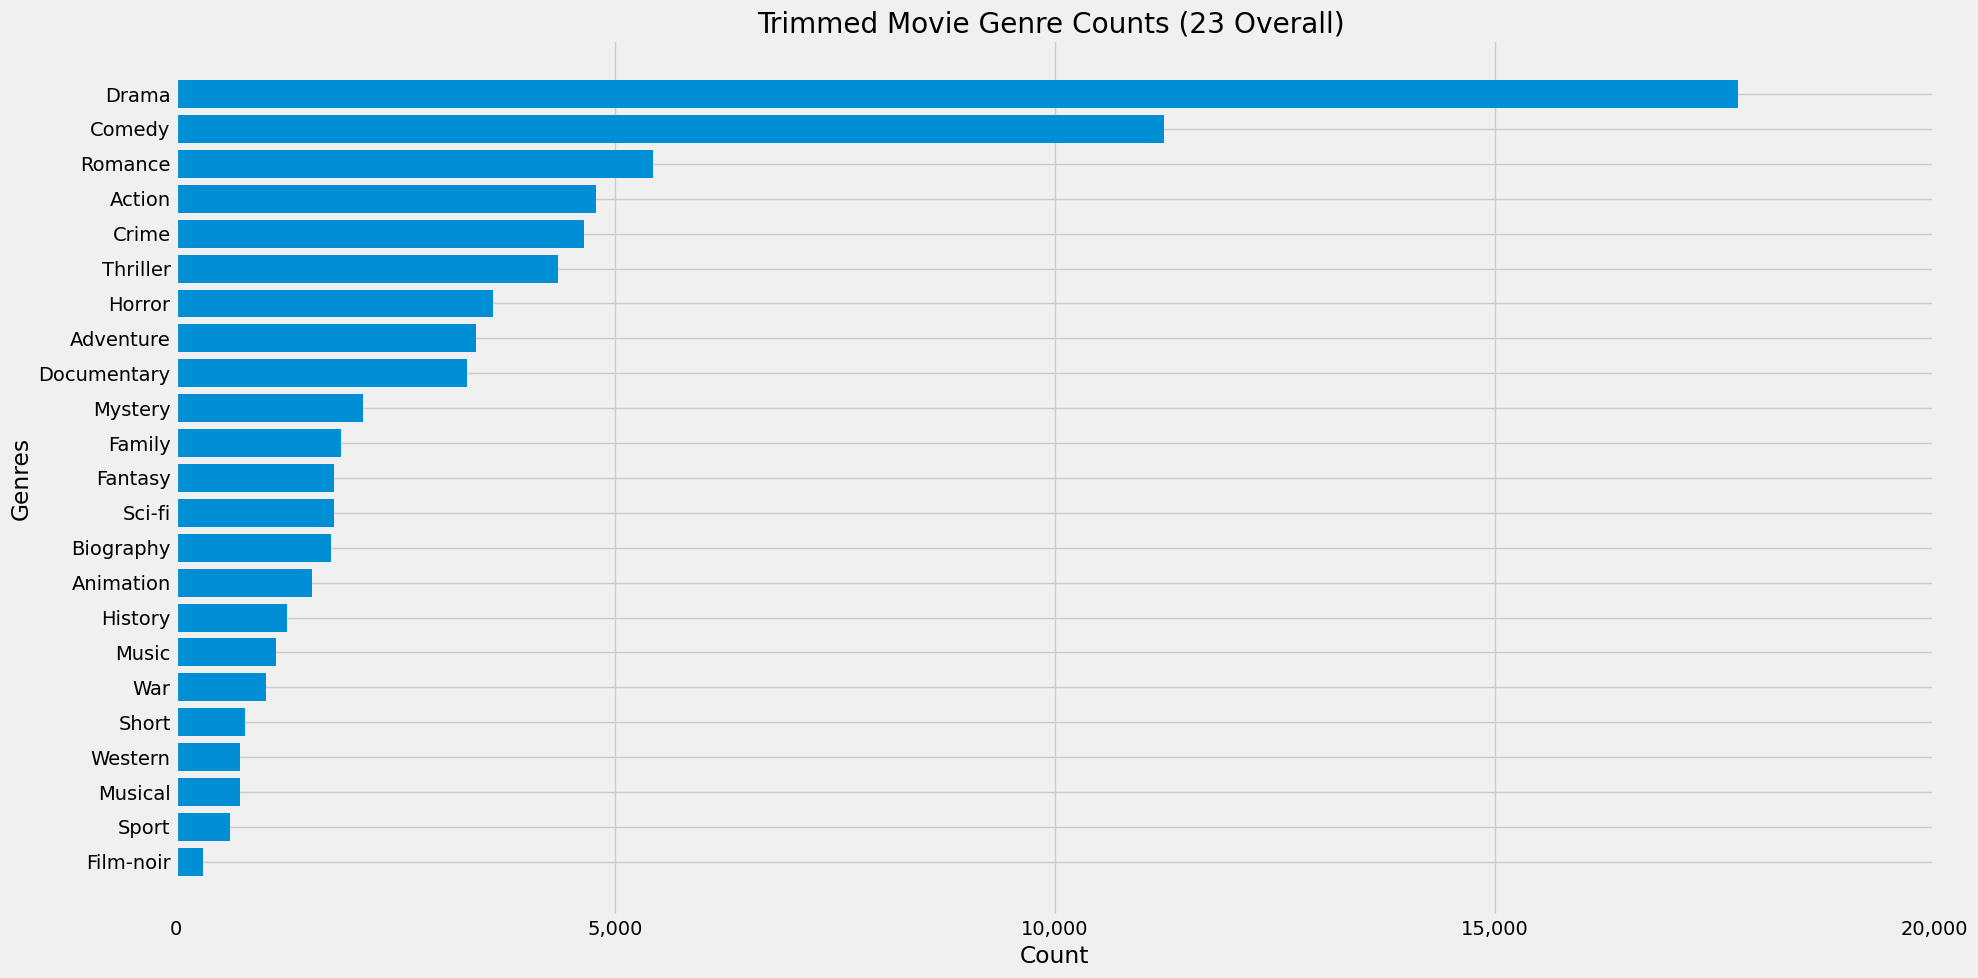

In [189]:

from matplotlib.pyplot import figure
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')
figure(figsize=(20, 10), dpi=100)
plt.barh(list(sorted_dict.keys()), sorted_dict.values())
plt.xticks( ticks,xt)
plt.ylabel("Genres")
plt.xlabel("Count")
plt.title("Trimmed Movie Genre Counts (23 Overall) ")
plt.show()


In [183]:
names = [x.capitalize() for x in df.iloc[:,6:29].columns]

In [185]:
tt = dict(zip(names, cnt))

In [186]:
d = tt

In [187]:
sorted_dict = {}
sorted_keys = sorted(d, key=d.get)
for w in sorted_keys:
    sorted_dict[w] = d[w]

In [188]:
sorted_dict

{'Film-noir': 317,
 'Sport': 622,
 'Musical': 728,
 'Western': 733,
 'Short': 786,
 'War': 1030,
 'Music': 1137,
 'History': 1269,
 'Animation': 1550,
 'Biography': 1766,
 'Sci-fi': 1797,
 'Fantasy': 1804,
 'Family': 1885,
 'Mystery': 2127,
 'Documentary': 3313,
 'Adventure': 3413,
 'Horror': 3610,
 'Thriller': 4351,
 'Crime': 4646,
 'Action': 4781,
 'Romance': 5431,
 'Comedy': 11237,
 'Drama': 17770}